In [1]:

!pip install sentence-transformers

import os
from glob import glob
from PIL import Image
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3.10.19:
      Successfully uninstalled nvidia-curand-cu12-10.3.10.19
  Attemp

2025-07-05 21:33:05.695396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751751185.868143      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751751185.928527      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!pip install faiss-gpu-cu11  # For CUDA 11.x
!pip install faiss-gpu-cu12  # For CUDA 12.x


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 MB 35.5 MB/s eta 0:00:00


In [3]:
import faiss

Total images found: 52712


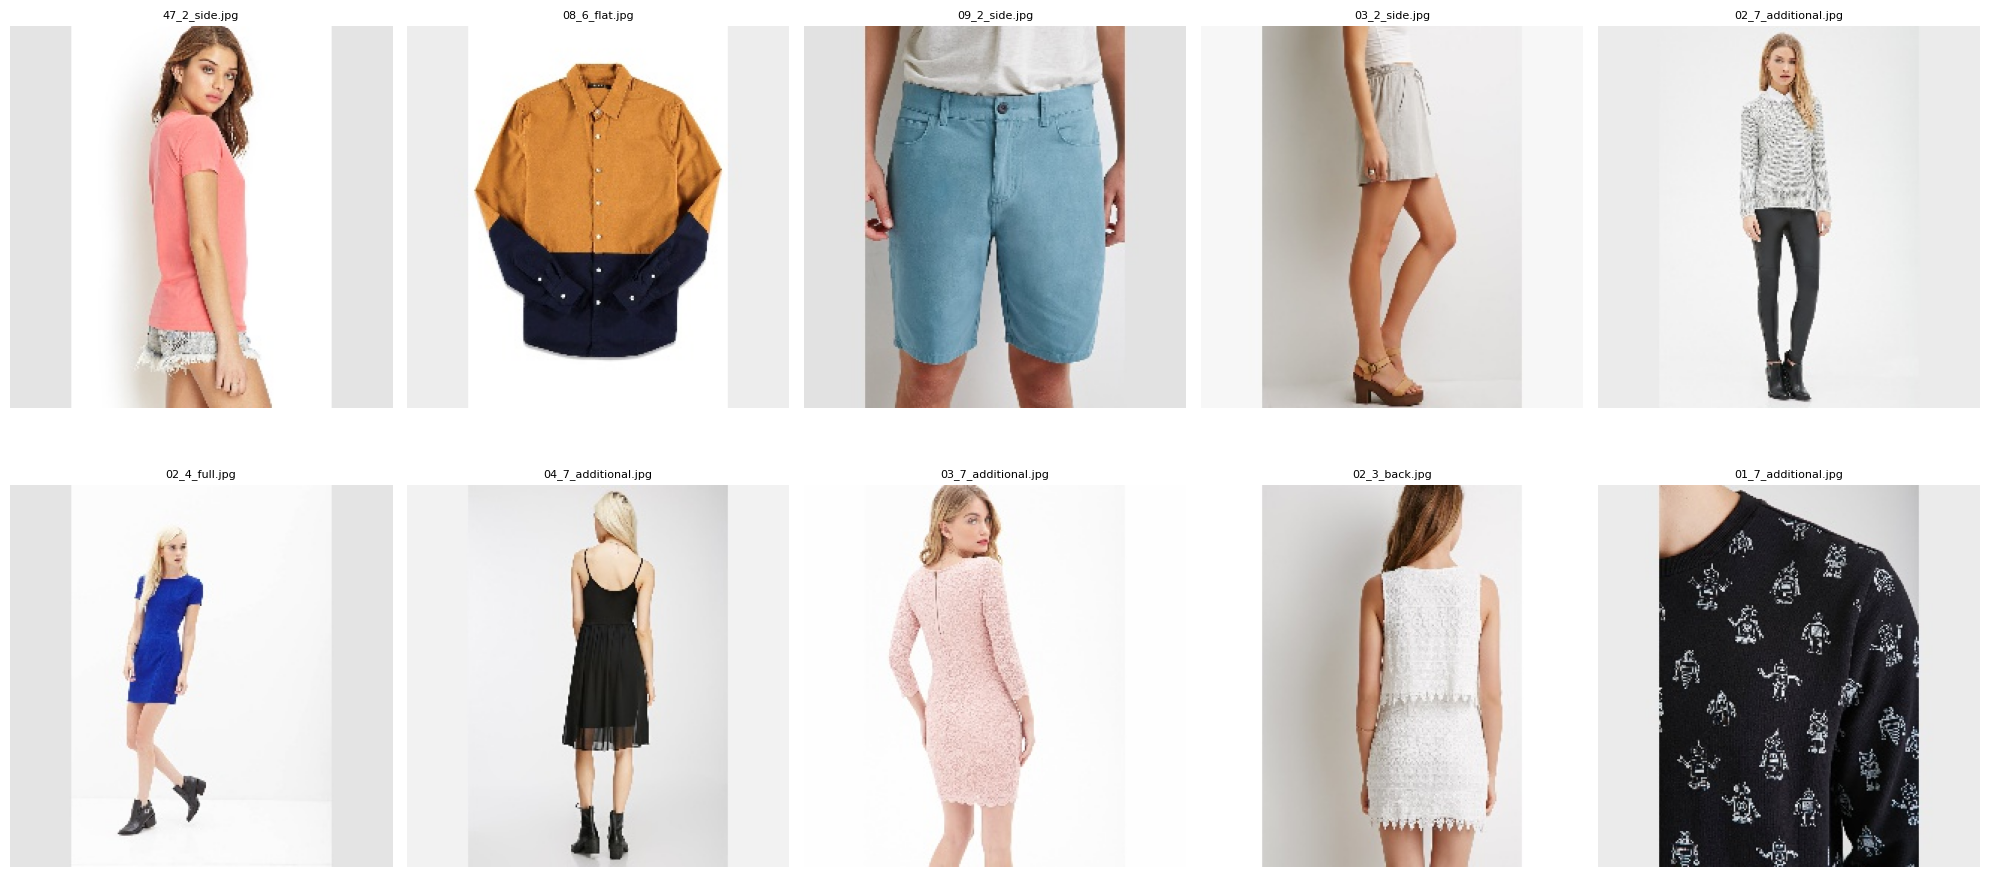

In [4]:
import os
import random
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# Base image folder
image_folder = '/kaggle/input/deepfashion/img'

# Recursively get all .jpg image paths
image_files = glob(os.path.join(image_folder, '**', '*.jpg'), recursive=True)
print(f"Total images found: {len(image_files)}")

# Randomly select 10 image files
random.seed(42)
selected_images = random.sample(image_files, 10)

# Display the selected images
plt.figure(figsize=(20, 10))
for i, image_path in enumerate(selected_images):
    img = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(image_path), fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
from transformers import AutoProcessor
from sentence_transformers import SentenceTransformer

# Load the processor with fast option
processor = AutoProcessor.from_pretrained('openai/clip-vit-base-patch32', use_fast=True)

# Load the model separately
model = SentenceTransformer('clip-ViT-B-32')


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [6]:
from tqdm import tqdm

def generate_clip_embeddings(images_path, model, batch_size=32):
    image_paths = glob(os.path.join(images_path,  '**', '*.jpg'), recursive=True)

    images = []
    for img_path in image_paths:
        image = Image.open(img_path).convert('RGB')
        images.append(image)

    embeddings = []
    for i in tqdm(range(0, len(images), batch_size)):
        batch = images[i:i+batch_size]
        batch_embeddings = model.encode(batch, convert_to_numpy=True, show_progress_bar=False)
        embeddings.extend(batch_embeddings)

    return embeddings, image_paths

IMAGES_PATH = '/kaggle/input/deepfashion/img'
model = SentenceTransformer('clip-ViT-B-32')
embeddings, image_paths = generate_clip_embeddings(IMAGES_PATH, model)

100%|██████████| 1648/1648 [04:27<00:00,  6.17it/s]


In [7]:
import faiss
import numpy as np
import os

def create_faiss_index(embeddings, image_paths, output_path):
    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Normalize embeddings for cosine similarity
    vectors = np.array(embeddings).astype(np.float32)
    vectors /= np.linalg.norm(vectors, axis=1, keepdims=True)

    dimension = vectors.shape[1]

    # Create HNSW index
    index = faiss.IndexHNSWFlat(dimension, 32)  # 32 is the number of neighbors
    index.hnsw.efSearch = 64                    # higher = better accuracy, slower search
    index = faiss.IndexIDMap(index)             # allows you to use custom IDs

    # Add vectors with unique IDs
    index.add_with_ids(vectors, np.arange(len(vectors)))

    # Save the index to disk
    faiss.write_index(index, output_path)
    print(f"Index created and saved to {output_path}")

    # Save image paths alongside index
    with open(output_path + '.paths', 'w') as f:
        for img_path in image_paths:
            f.write(img_path + '\n')

    return index

# Example usage
OUTPUT_INDEX_PATH = "db/vector.index"
index = create_faiss_index(embeddings, image_paths, OUTPUT_INDEX_PATH)


Index created and saved to db/vector.index


In [8]:
def load_faiss_index(index_path):
    index = faiss.read_index(index_path)
    with open(index_path + '.paths', 'r') as f:
        image_paths = [line.strip() for line in f]
    print(f"Index loaded from {index_path}")
    return index, image_paths

index, image_paths = load_faiss_index(OUTPUT_INDEX_PATH)

Index loaded from db/vector.index


In [9]:
import numpy as np
from PIL import Image

def retrieve_similar_images(query, model, index, image_paths, top_k=3):
    # Check if the query is an image path or a text string
    if isinstance(query, str) and query.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        # Load image and convert to RGB
        query_input = Image.open(query).convert('RGB')
    else:
        # Assume it's text or already an image object
        query_input = query

    # Encode the query using the CLIP model
    query_features = model.encode(query_input, convert_to_numpy=True)
    query_features = query_features.astype(np.float32)
    query_features /= np.linalg.norm(query_features)  # Normalize for cosine similarity

    # Perform search
    distances, indices = index.search(query_features.reshape(1, -1), top_k)

    # Retrieve image paths
    retrieved_images = [image_paths[int(idx)] for idx in indices[0]]

    return query_input, retrieved_images


In [10]:
def visualize_results(query, retrieved_images):
    plt.figure(figsize=(12, 5))

    # If image query
    if isinstance(query, Image.Image):
        plt.subplot(1, len(retrieved_images) + 1, 1)
        plt.imshow(query)
        plt.title("Query Image")
        plt.axis('off')
        start_idx = 2

    # If text query
    else:
        plt.subplot(1, len(retrieved_images) + 1, 1)
        plt.text(0.5, 0.5, f"Query:\n\n '{query}'", fontsize=16, ha='center', va='center')
        plt.axis('off')
        start_idx = 2

    # Display images
    for i, img_path in enumerate(retrieved_images):

        plt.subplot(1, len(retrieved_images) + 1, i + start_idx)
        plt.imshow(Image.open(img_path))
        plt.title(f"Match {i + 1}")
        plt.axis('off')

    plt.show()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

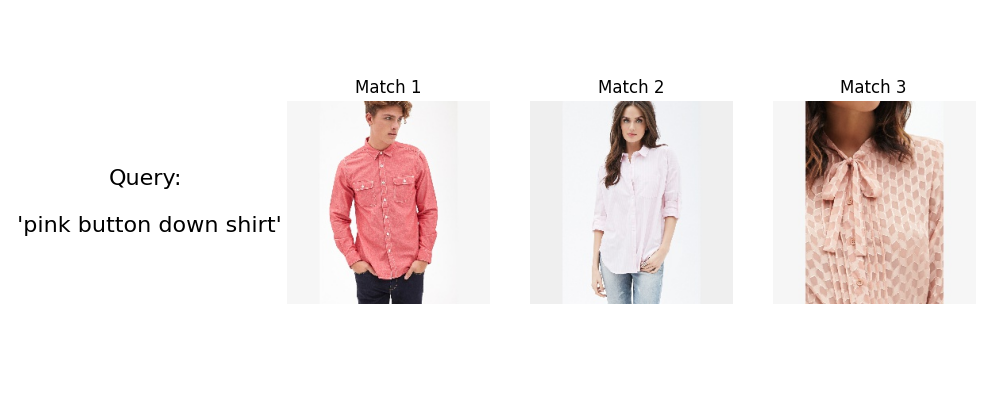

In [11]:

query = 'pink button down shirt'
query, retrieved_images = retrieve_similar_images(query, model, index, image_paths, top_k=3)
visualize_results(query, retrieved_images)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

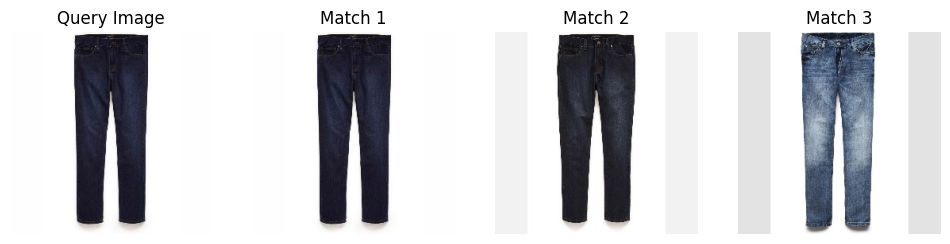

In [12]:

query = '/kaggle/input/deepfashion/img/img/MEN/Denim/id_00000750/01_6_flat.jpg'
query, retrieved_images = retrieve_similar_images(query, model, index, image_paths, top_k=3)
visualize_results(query, retrieved_images)